In [1]:
from scipy.signal import find_peaks, peak_widths
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\benk\Documents\GitHub\XRD-Fitting\Peak\Graphite_LiC12\Graphite_Small_Big\fit_72.csv")
df = df[(df['q'] >= (q_min := 1.75)) & (df['q'] <= (q_max := 1.9))]

<Axes: xlabel='q'>

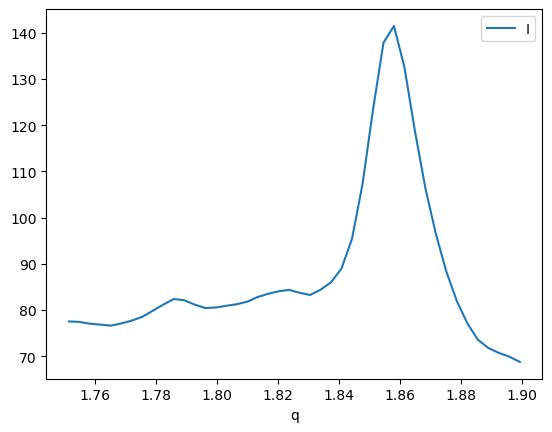

In [3]:
df.plot(x='q', y='I')

{'centers': array([1.78588854, 1.82369461, 1.85806328]), 'sigmas': array([0.00371811, 0.00342884, 0.00828764]), 'amplitude': array([ 1.95183563,  1.1120224 , 64.89470673])}


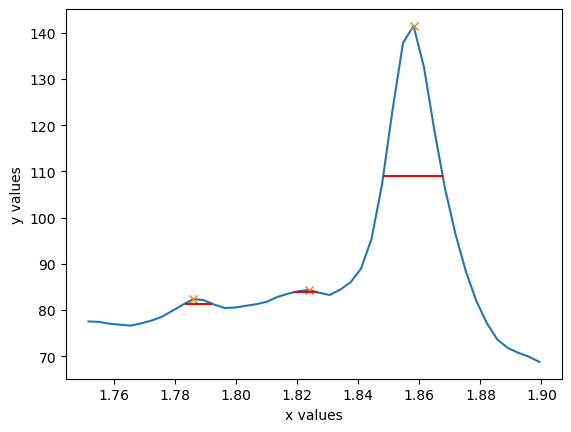

In [20]:
def index_to_xdata(xdata, indices):
    "interpolate the values from signal.peak_widths to xdata"
    ind = np.arange(len(xdata))
    f = interp1d(ind,xdata)
    return f(indices)

x = np.array(df.q)
y = np.array(df.I)

peak_vals = {}

peaks, vals = find_peaks(y, height = .1, prominence = .1)
widths, width_heights, left_ips, right_ips = peak_widths(y, peaks)

widths = index_to_xdata(x, widths)
left_ips = index_to_xdata(x, left_ips)
right_ips = index_to_xdata(x, right_ips)

peak_vals['centers'] = np.array(np.take(x, peaks))
peak_vals['sigmas'] = np.array((right_ips - left_ips)/2.35)
peak_vals['amplitude'] = np.array(vals['prominences'])
print(peak_vals)
plt.plot(x,y)
plt.plot(x[peaks], y[peaks], "x")
plt.hlines(width_heights, left_ips, right_ips, color='r')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()
